In [18]:
import numpy as np
import pandas as pd
import seaborn as sb
import statistics as sts

dataset = pd.read_csv("ds_salaries.csv")
dataset.shape

(3755, 11)

In [3]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Análise Exploratória

work_year
2020      76
2021     230
2022    1664
2023    1785
dtype: int64


<Axes: xlabel='work_year'>

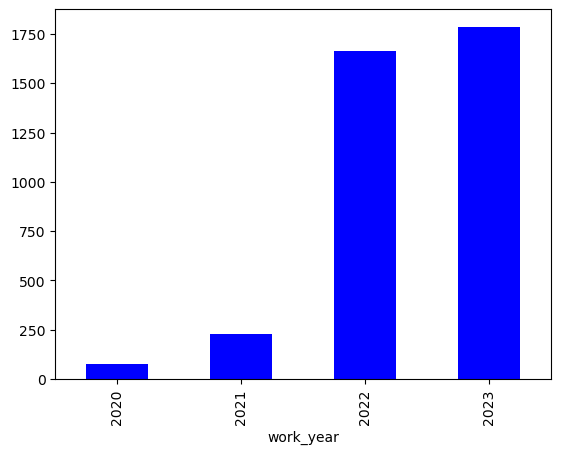

In [34]:
#analisando coluna 'work_year'
agrupado = dataset.groupby(['work_year']).size()
print(agrupado)
agrupado.plot.bar(color = 'blue')

In [ ]:
#analisando coluna 'experience_level'
agrupado = dataset.groupby(['experience_level']).size()
print(agrupado)
agrupado.plot.bar(color = 'green')

In [ ]:
#coluna 'employment_type'
agrupado = dataset.groupby(['employment_type']).size()
print(agrupado)
agrupado.plot.bar(color = 'purple')

In [ ]:
#coluna 'job_title'
agrupado = dataset.groupby(['job_title']).size()
print(agrupado)
dataset['job_title'].describe()

In [ ]:
#coluna 'salary'
agrupado = dataset.groupby(['salary']).size()
print(agrupado)
sb.boxplot(dataset['salary']).set_title('Salário')

salary_currency
AUD       9
BRL       6
CAD      25
CHF       4
CLP       1
CZK       1
DKK       3
EUR     236
GBP     161
HKD       1
HUF       3
ILS       1
INR      60
JPY       3
MXN       1
PLN       5
SGD       6
THB       2
TRY       3
USD    3224
dtype: int64


<Axes: xlabel='salary_currency'>

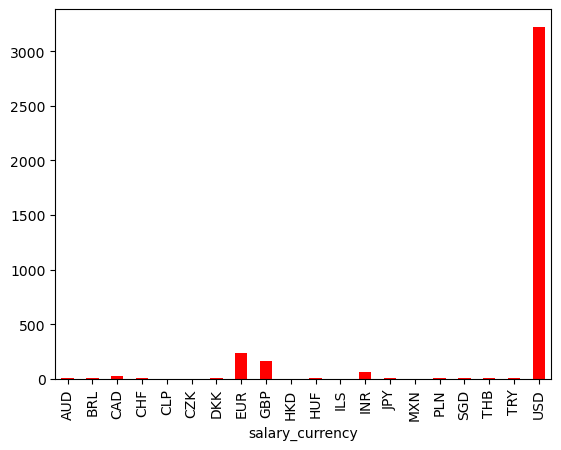

In [30]:
#coluna 'salary_currency'
agrupado = dataset.groupby(['salary_currency']).size()
print(agrupado)
agrupado.plot.bar(color = 'red')